In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

%matplotlib inline

# Notes

- Sharp = Sostenido = # -> After to the Note
- Flat = Bemol = b -> Previous to the Note

In [2]:
notes = ['A-b', 'A', 'A-#', 'B-b', 'B', 'C', 'C-#', 'D-b','D', 'D-#', 'E-b', 'E', 'F', 'F-#', 'G-b', 'G', 'G-#']

In [3]:
len(notes)

17

There are only 12 notes if we consider $X_{0}$-# = $X_{1}$-b

In [4]:
synonym_notes = {'A' : 'La',
                 'B' : 'Si',
                 'C' : 'Do',
                 'D' : 'Re',
                 'E' : 'Mi',
                 'F' : 'Fa',
                 'G' : 'Sol'
                }

# Plot Frets

In [5]:
frets = 22
strings = 6

In [6]:
tuning = ['E', 'A', 'D', 'G', 'B', 'E'] # From last to first strings

In [7]:
def plot_guitar(frets, strings, tuning):
    dots = [3, 5, 7, 9, 12]
    
    for f in range(1, int(np.ceil(frets//12))+1):
        dots += [12*f+d for d in dots[:5]]
        
    dot_size = 10
    assert strings == len(tuning)
    fig = plt.figure(figsize=(frets, strings))

    plt.plot()
    for i in range(1, strings+1):
        plt.axhline(y=i, color='k', linewidth=0.5)

    for j in range(0, frets+1):
        plt.axvline(x=j+0.5, color='k', linewidth=5)
        if (j % 12 == 0) & (j != 0):
            plt.plot([j,j], [(strings+1)/2.0 + 1, (strings+1)/2.0 - 1], 'o',
                     markersize=dot_size,
                     markeredgecolor="gray",
                     markerfacecolor='gray')
        elif j in dots:
            plt.plot(j, (strings+1)/2.0, 'o',
                     markersize=dot_size,
                     markeredgecolor="gray",
                     markerfacecolor='gray')

    plt.xticks(range(1, frets+1), fontsize=16)
    plt.yticks(range(1, strings+1), tuning, fontsize=16)

    plt.xlim((0, frets+1))
    plt.ylim((0, strings+1))
    return fig

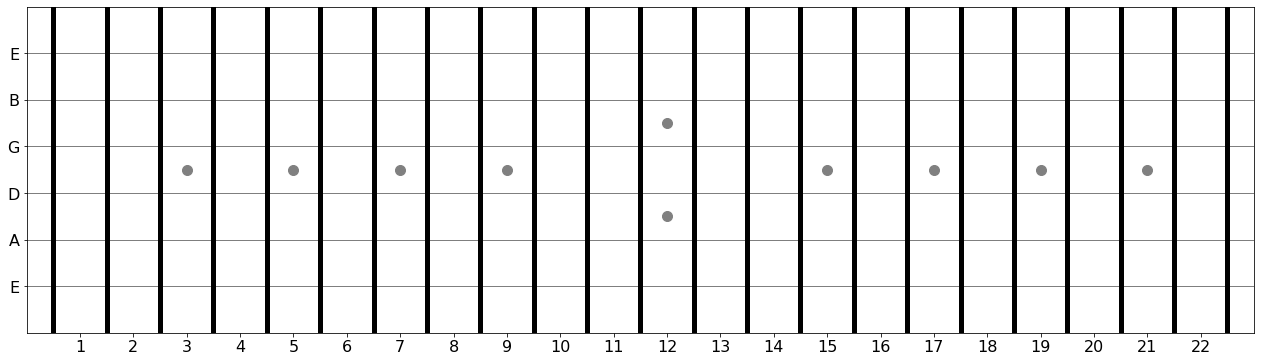

In [8]:
guitar = plot_guitar(frets, strings, tuning)

# Position of Notes

### Map notes into guitar positions

In [9]:
def map_notes(notes, tuning):
    G = defaultdict(list)

    node_count = 0

    old = ''
    for n in notes:
        if ('#' in old) and ('b' in n):
            G[node_count].append(n)
        else:
            node_count += 1
            if node_count == 13: G[1].append(n)
            else: G[node_count] = [n]
        old = n

    notes_per_position = dict()
    positions_per_note = defaultdict(list)

    for i, string in enumerate(tuning):
        for k, v in G.items():
            if string in v:
                start = k
                break

        for fret in range(1, frets+1):
            #plt.scatter(j, fret, s=, c='b')
            if start == 12:
                start = 0
            pos = (6-i, fret)
            labels = G[start+1]
            notes_per_position[pos] = labels
            for label in labels:
                positions_per_note[label].append(pos)

            start += 1
    return notes_per_position, positions_per_note

### Plot notes on guitar

In [10]:
def plot_notes_on_guitar(frets, strings, tuning):
    
    fig = plot_guitar(frets, strings, tuning)

    notes_per_position, positions_per_note = map_notes(notes, tuning)
    for pos, note in notes_per_position.items():
        label = '\n'.join(note)
        plt.text(pos[1], 7-pos[0], label,
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=14,
                 color='red')
    return fig

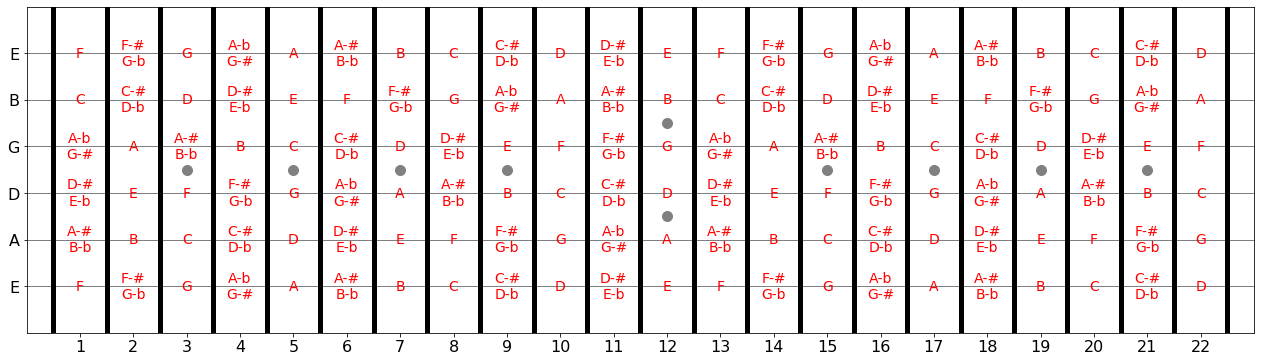

In [11]:
notes_on_guitar = plot_notes_on_guitar(frets, strings, tuning)

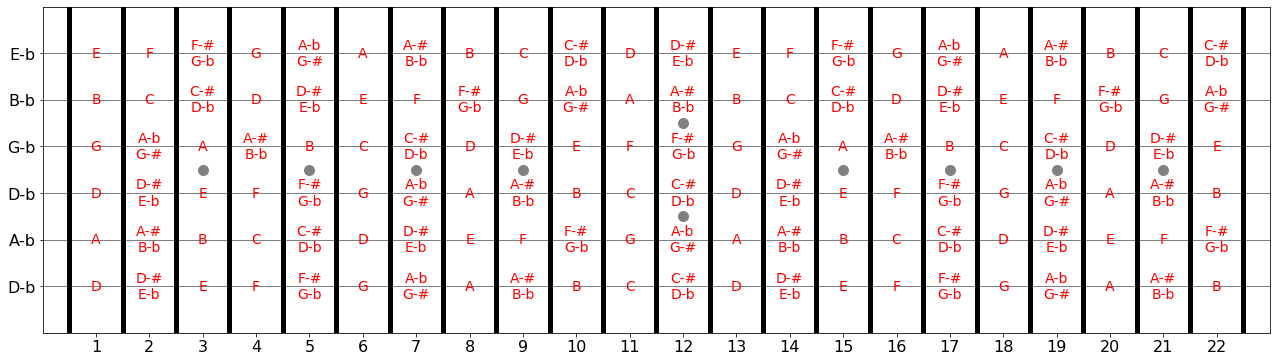

In [12]:
notes_on_guitar = plot_notes_on_guitar(frets, strings, ['D-b', 'A-b', 'D-b', 'G-b', 'B-b', 'E-b'])

### Plot all positions for note on given position (string, fret):

In [13]:
def plot_all_positions(positions, frets, strings, tuning, same_plot = True):
    if type(positions) == tuple:
        multiple_pos = [positions]
    elif type(positions) == list:
        multiple_pos = positions
    else:
        raise ValueError('positions must be either a tuple or a list of tuples')

    notes_per_position, positions_per_note = map_notes(notes, tuning)
    
    if same_plot:
        fig = plot_guitar(frets, strings, tuning)

    for pos in multiple_pos:
        if not same_plot:
            fig = plot_guitar(frets, strings, tuning)
        note = notes_per_position[pos]
        label = '\n'.join(note)
        note = note[0]
        positions_ = positions_per_note[note]

        for p in positions_:
            plt.text(p[1], 7-p[0], label,
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=16,
                     color='red')

        if not same_plot:
            plt.title('String: {} - Fret: {}'.format(*pos), fontsize=30)
        else:
            plt.title('Positions: {}'.format('-'.join([str(pos) for pos in multiple_pos])), fontsize=30)

In [14]:
positions = (5,12)

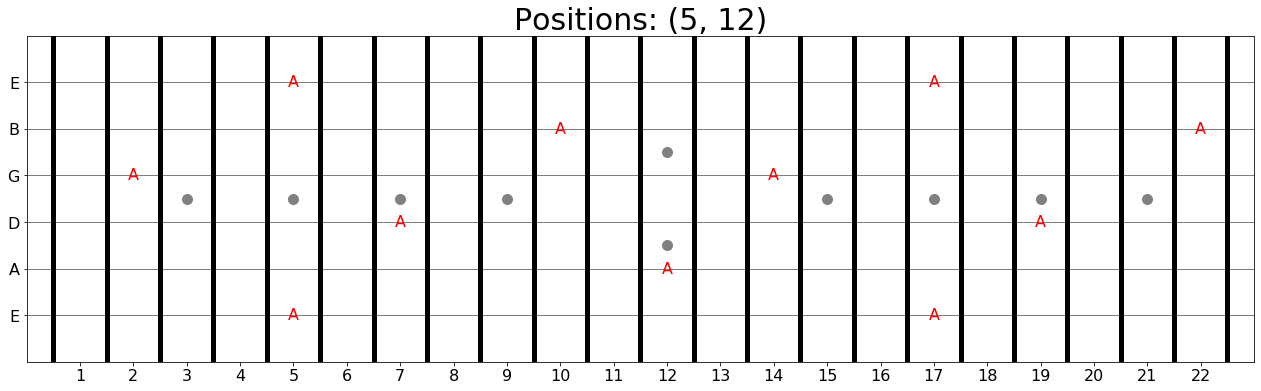

In [15]:
plot_all_positions(positions, frets, strings, tuning, same_plot = True)

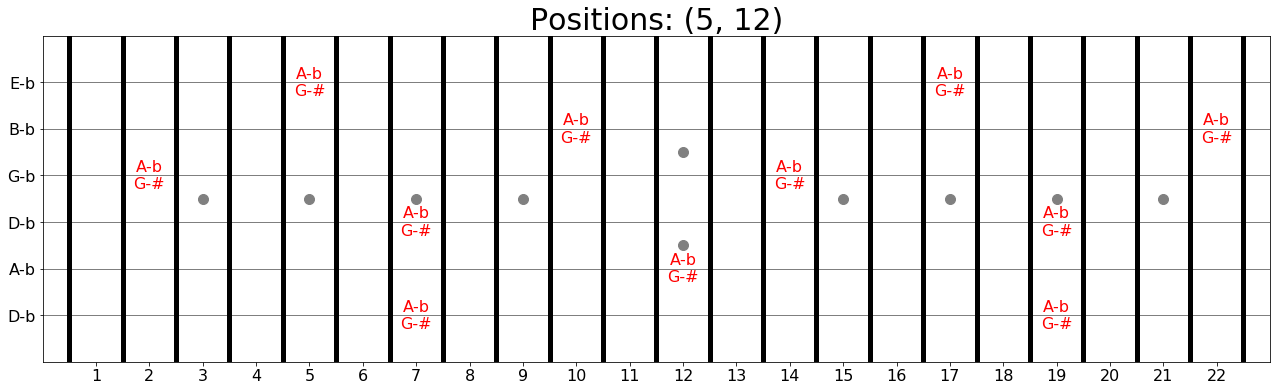

In [16]:
plot_all_positions(positions, frets, strings, ['D-b', 'A-b', 'D-b', 'G-b', 'B-b', 'E-b'], same_plot = True)

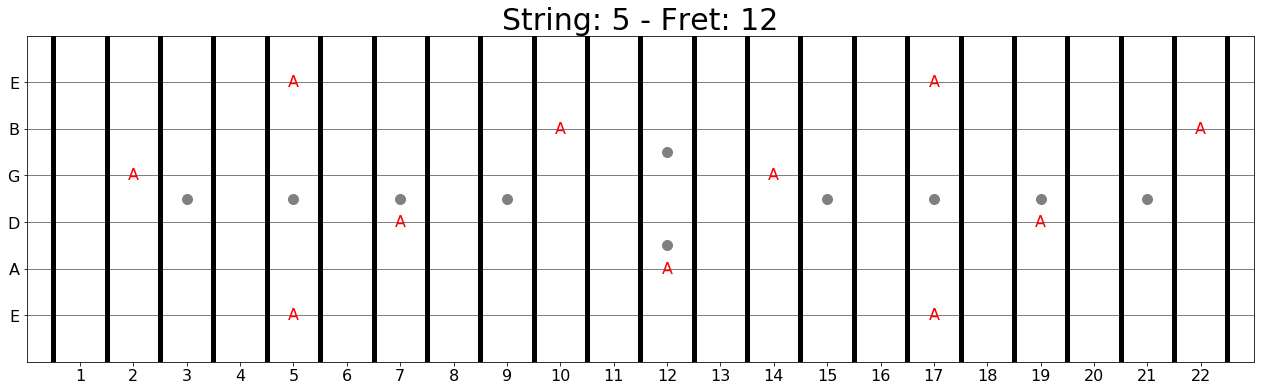

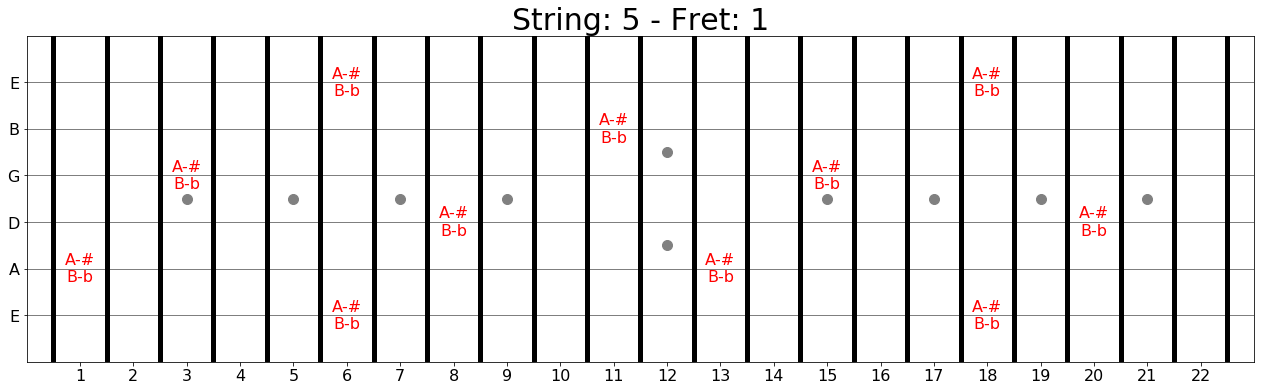

In [17]:
plot_all_positions([(5,12), (5,1)], frets, strings, tuning, same_plot = False)